# Data Exploration: COMPAS Dataset

This notebook performs an initial data exploration on the COMPAS dataset. The goal is to understand:
- The shape and structure of the data
- Missing values and distributions
- Target variable imbalance
- Basic correlation patterns
- Initial insights into potential features

No preprocessing, imputation, or cleaning is performed here. The raw dataset is loaded directly to ensure transparency and reproducibility.


In [1]:
# Load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure pandas display
pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("../data/cox-violent-parsed.csv")

# Show basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,3,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,13001275CF10A,26/01/2013,NaN,1.0,(F3),Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),05/07/2013,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,4,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,13005330CF10A,13/04/2013,NaN,1.0,(F3),Possession of Cocaine,1,13011511MM10A,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,16/06/2013,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


## 1. Dataset Overview

Let's inspect the structure, types, and a sample of rows. We'll also check how many rows and features are available, and if the target variable `is_recid` is balanced or not.

is_recid
 0    0.495687
 1    0.459544
-1    0.044770
Name: proportion, dtype: float64


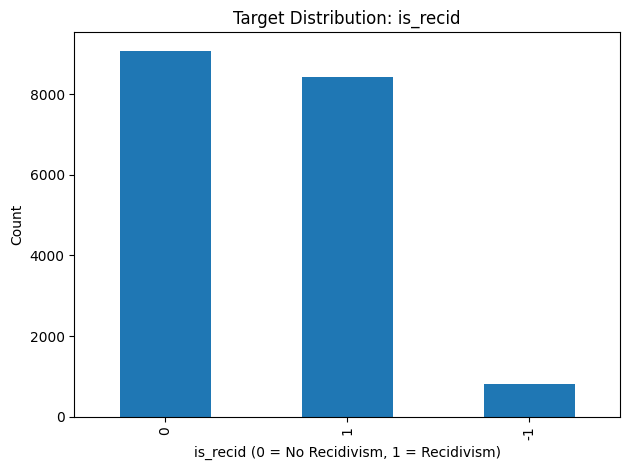


Value counts for 'sex':
sex
Male      14933
Female     3383
Name: count, dtype: int64

Value counts for 'race':
race
African-American    9791
Caucasian           6086
Hispanic            1451
Other                860
Asian                 71
Native American       57
Name: count, dtype: int64

Value counts for 'c_charge_degree':
c_charge_degree
(F3)     10294
(M1)      3681
(F2)      1503
(M2)      1283
(F1)       298
(F7)       184
(MO3)      154
(NI0)       15
(F6)        15
(F5)        13
(CO3)        6
(X)          1
(CT)         1
(TCX)        1
Name: count, dtype: int64

Value counts for 'c_charge_desc':
c_charge_desc
arrest case no charge               3085
Battery                             2182
Possession of Cocaine               1435
Grand Theft in the 3rd Degree       1191
Driving While License Revoked        484
                                    ... 
Burglary Damage Property>$1000         1
Purchase/P/W/Int Cannabis              1
Trespass Property w/Dang Weap          1

In [2]:
# Target distribution
print(df["is_recid"].value_counts(normalize=True))
df["is_recid"].value_counts().plot(kind="bar", title="Target Distribution: is_recid")
plt.xlabel("is_recid (0 = No Recidivism, 1 = Recidivism)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Value counts for key categorical features
categorical_cols = ["sex", "race", "c_charge_degree", "c_charge_desc"]
for col in categorical_cols:
    print(f"\nValue counts for '{col}':\n{df[col].value_counts()}")


## 2. Missing Values

We identify missing or null values in the dataset. These will later be handled through imputation during the pipeline phase.

In [3]:
def missing_values_summary(df):
    nulls = df.isnull().sum()
    nulls = nulls[nulls > 0].sort_values(ascending=False)
    return pd.DataFrame({
        "Missing Values": nulls,
        "Percentage": round(nulls / len(df) * 100, 2)
    })

missing_values_summary(df)


,Missing Values,Percentage
violent_recid,18316,100.00
vr_offense_date,16977,92.69
vr_case_number,16977,92.69
vr_charge_degree,16977,92.69
vr_charge_desc,16977,92.69
c_arrest_date,15231,83.16
r_jail_out,11957,65.28
r_jail_in,11957,65.28
r_days_from_arrest,11957,65.28
r_charge_desc,10039,54.81


## 3. Feature Distributions

To gain an understanding of the range and skew of numerical features, we plot their distributions.


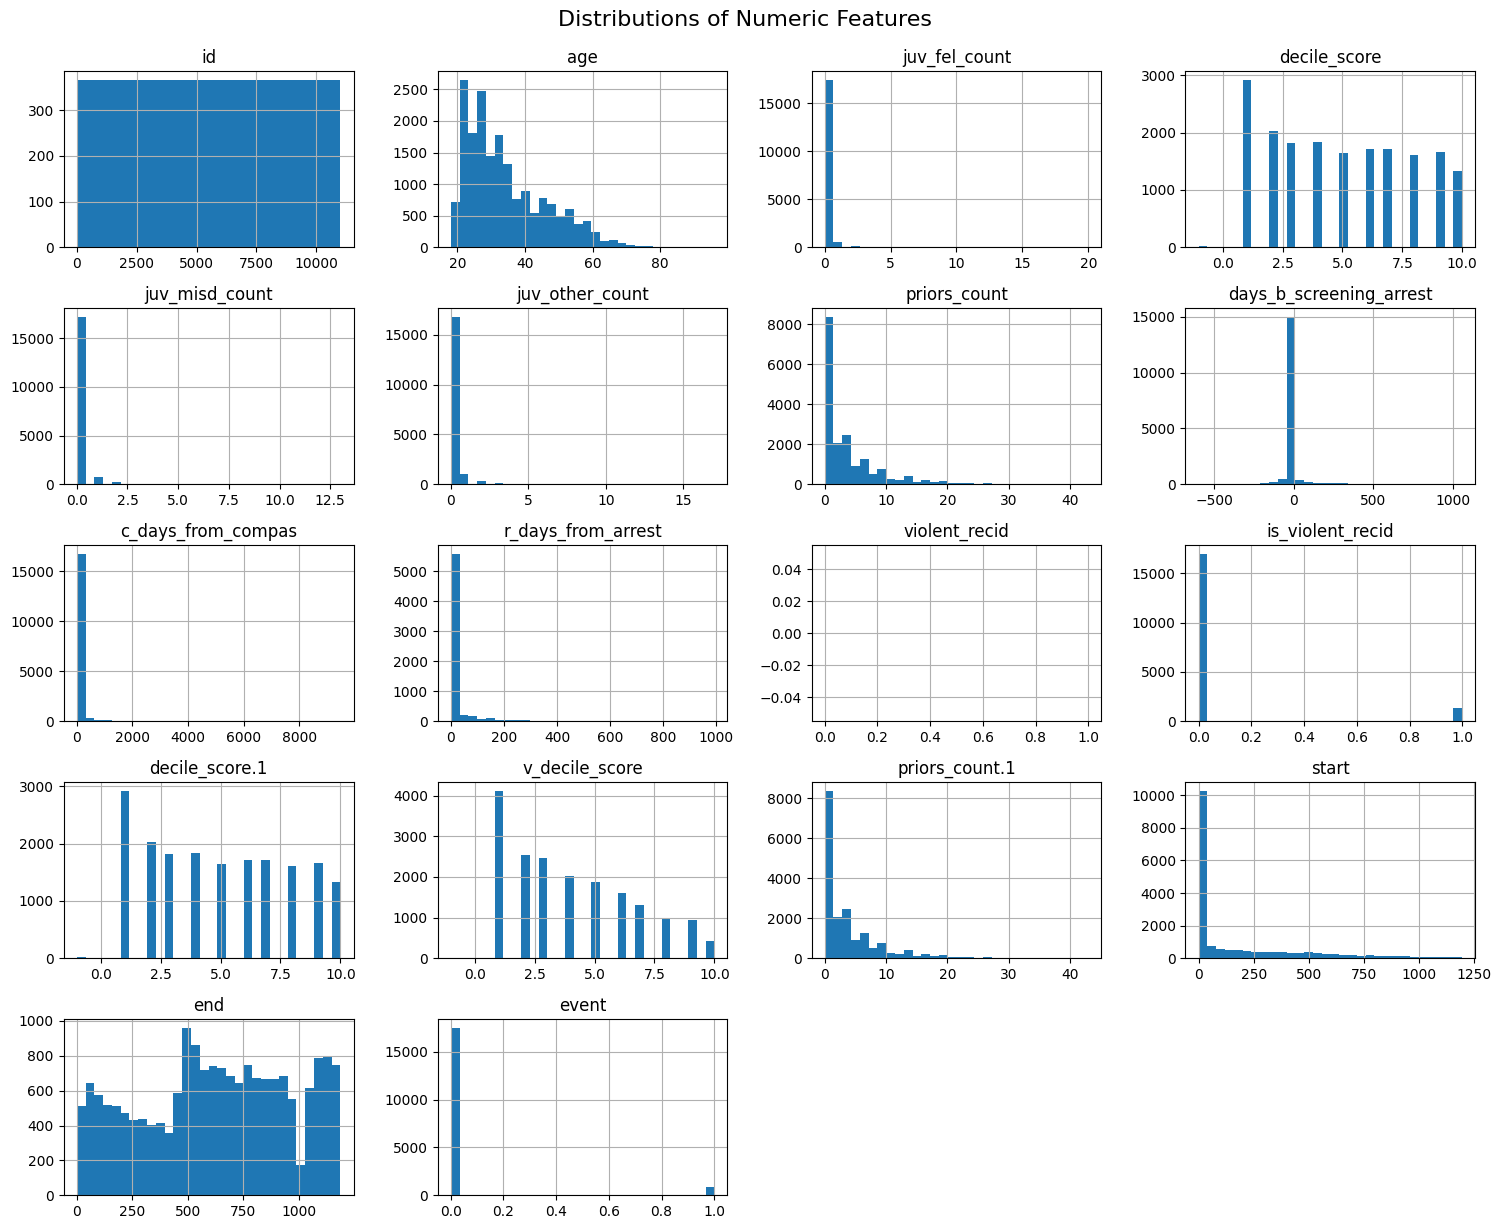

In [6]:
# Histograms for numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("is_recid")

df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.suptitle("Distributions of Numeric Features", fontsize=16, y=1.02)
plt.savefig("../reports/01_data_exploration/numeric_features_distributions.png")
plt.show()


## 4. Correlation Matrix

Pearson correlation matrix is helpful to see which numeric features are strongly related to the target.


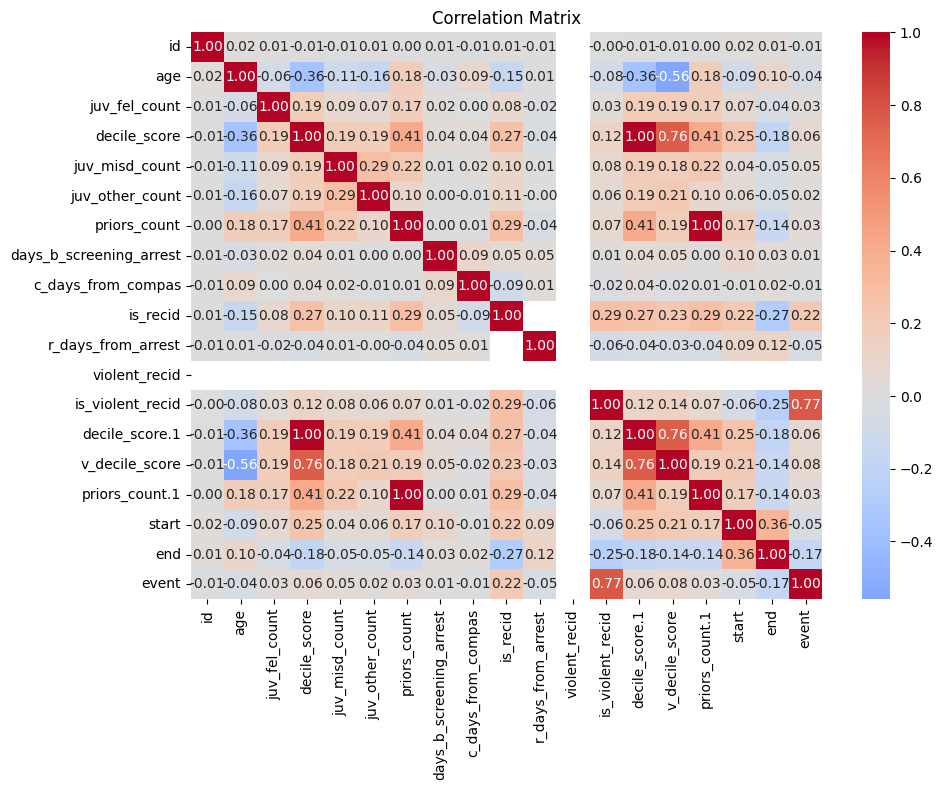

is_recid                   1.000000
priors_count.1             0.286582
priors_count               0.286582
is_violent_recid           0.285124
decile_score               0.273761
decile_score.1             0.273761
v_decile_score             0.229699
event                      0.219652
start                      0.216231
juv_other_count            0.108340
juv_misd_count             0.104878
juv_fel_count              0.082217
days_b_screening_arrest    0.054021
id                         0.013347
c_days_from_compas        -0.087928
age                       -0.149957
end                       -0.273047
r_days_from_arrest              NaN
violent_recid                   NaN
Name: is_recid, dtype: float64

In [7]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("../reports/01_data_exploration/correlation_matrix.png")
plt.show()

# Target correlation
corr_matrix["is_recid"].sort_values(ascending=False)


## Group Distribution of Target

A quick look at how `is_recid` is distributed across sensitive groups like sex and race. 


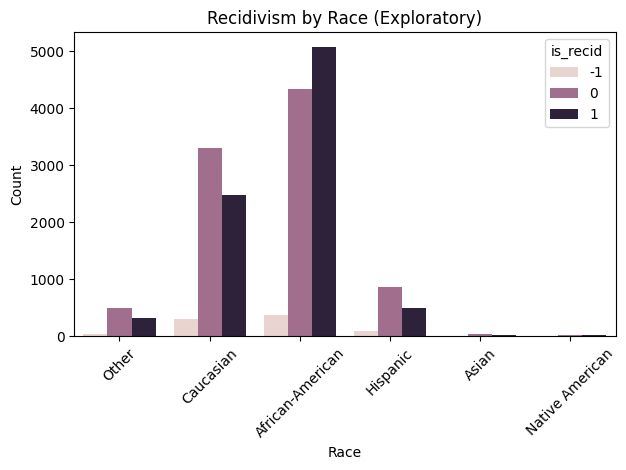

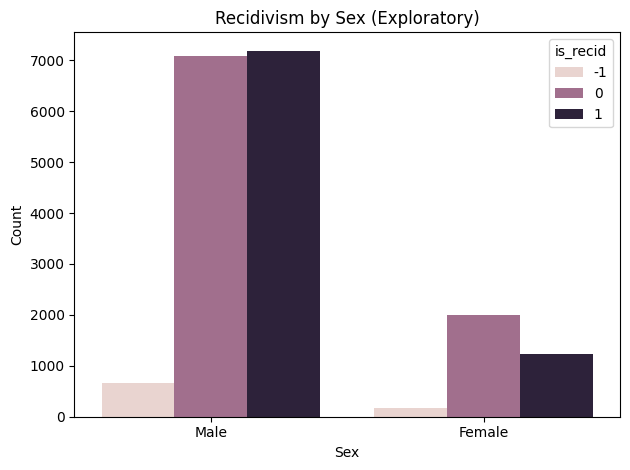

In [8]:
# Distribution of recidivism by race and sex
sns.countplot(data=df, x="race", hue="is_recid")
plt.title("Recidivism by Race (Exploratory)")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="is_recid")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.countplot(data=df, x="sex", hue="is_recid")
plt.title("Recidivism by Sex (Exploratory)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="is_recid")
plt.tight_layout()
plt.show()


## Outlier detection

A quick look into the selected features.

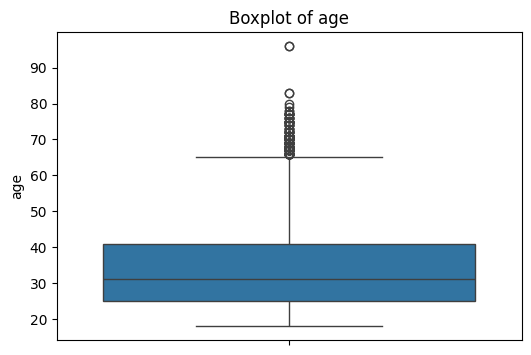

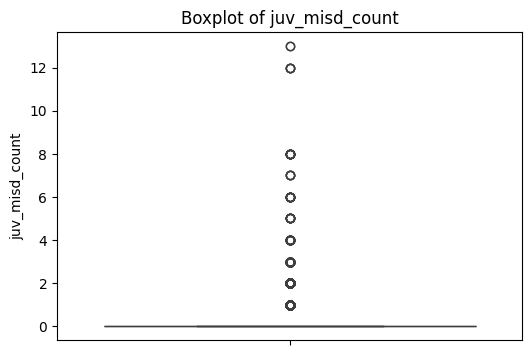

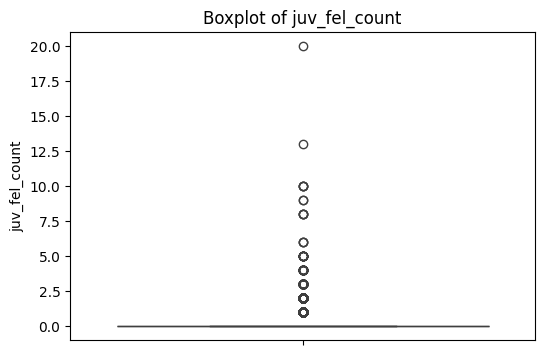

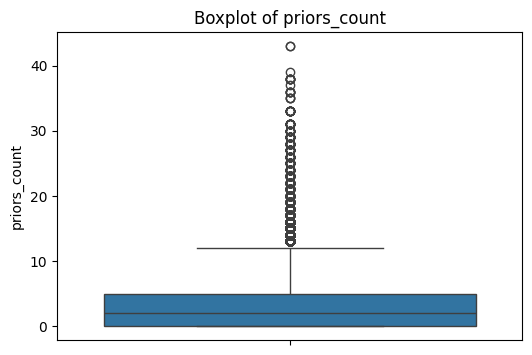

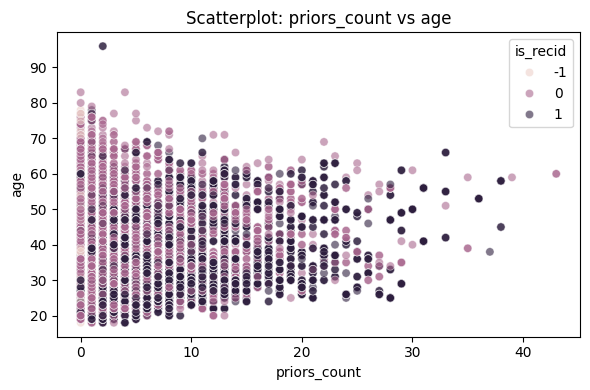

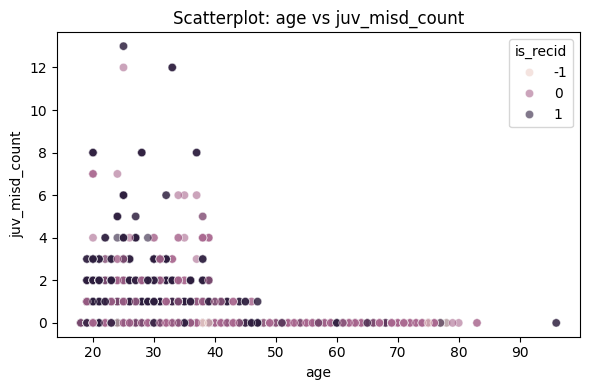

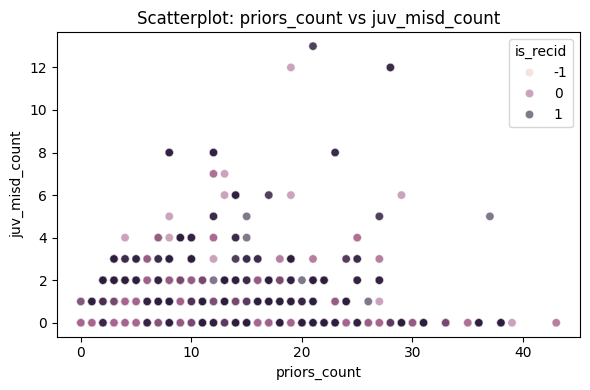

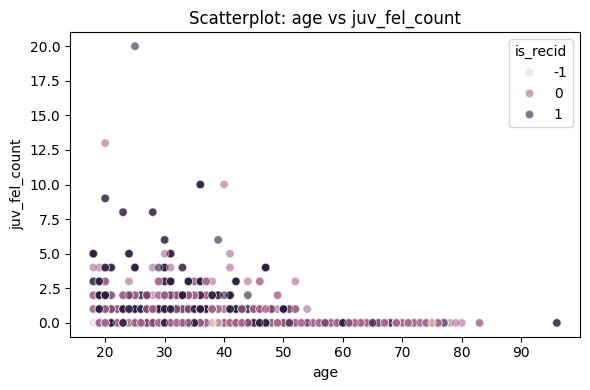

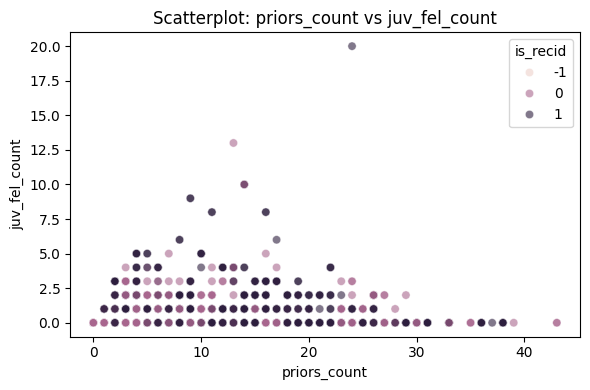

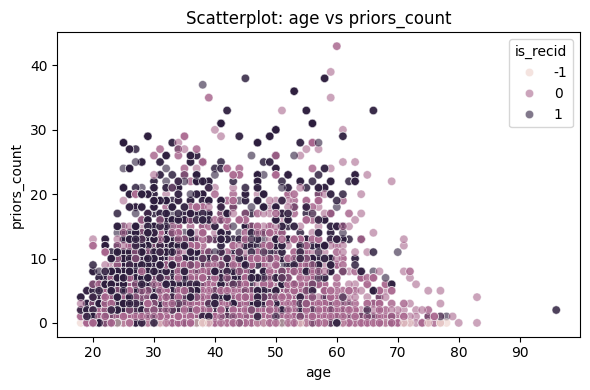

'../reports/o1_data_exploration'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set up the directory for saving plots
output_dir = "../reports/o1_data_exploration"
os.makedirs(output_dir, exist_ok=True)

# Load the encoded dataset
df_encoded = pd.read_csv("../data/cox-violent-parsed.csv")

# Define numeric features for boxplots and scatterplots
numeric_features = ["age", "juv_misd_count", "juv_fel_count", "priors_count"]
target = "is_recid"

# Create boxplots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=feature, data=df_encoded)
    plt.title(f"Boxplot of {feature}")
    plt.savefig(f"{output_dir}/boxplot_{feature}.png")
    plt.show()
    plt.close()

# Create scatterplots (vs. age and priors_count) colored by target
for feature in numeric_features:
    if feature != "age":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x="age", y=feature, hue=target, data=df_encoded, alpha=0.6)
        plt.title(f"Scatterplot: age vs {feature}")
        plt.tight_layout()
        plt.savefig(f"{output_dir}/scatter_age_vs_{feature}.png")
        plt.show()
        plt.close()

    if feature != "priors_count":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x="priors_count", y=feature, hue=target, data=df_encoded, alpha=0.6)
        plt.title(f"Scatterplot: priors_count vs {feature}")
        plt.tight_layout()
        plt.savefig(f"{output_dir}/scatter_priors_vs_{feature}.png")
        plt.show()
        plt.close()

output_dir

## 5. Observations & Next Steps

- The target variable `is_recid` appears imbalanced and contains an unknown class.
- Some features (e.g., `priors_count`, `age`) may be moderately predictive.
- Several features contain missing values and will require imputation.
- Outlier observations seem normal.
- Race and sex will be used later for fairness auditing and subgroup analysis.

We proceed next with modeling (`02_preprocessing_pipeline.ipynb`) where all preprocessing will be implemented via a pipeline.
